In [1]:
import yfinance as yf
df = yf.Ticker('TSLA').history()
display(df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-01,504.00,513.95,475.10,481.56,13353200,0,0
2020-04-02,481.03,494.26,446.40,454.47,19858400,0,0
2020-04-03,509.50,515.49,468.39,480.01,22562100,0,0
2020-04-06,511.20,521.00,497.96,516.24,14901800,0,0
2020-04-07,545.00,565.00,532.34,545.45,17919800,0,0


In [61]:
cols = ["Open", "High", "Low", "Close", "Volume"]
mat = df[cols].to_numpy()

normalized_mat = mat / mat.std(axis=0)
normalized_mat

array([[4.50966459, 4.44857461, 4.39114035, 4.25563547, 2.6240634 ],
       [4.30413484, 4.27814474, 4.12587888, 4.01623609, 3.90241295],
       [4.5588772 , 4.46190432, 4.32912277, 4.24193783, 4.43372231],
       [4.57408837, 4.50959699, 4.60242528, 4.5621091 , 2.92838181],
       [4.87652222, 4.89044587, 4.9201845 , 4.82024331, 3.52145488],
       [4.9588415 , 4.82301831, 4.92933463, 4.85020137, 2.48705527],
       [5.02943922, 4.97856046, 5.14912272, 5.0637078 , 2.68238815],
       [5.28060249, 5.64348798, 5.36558348, 5.75256647, 4.41668473],
       [6.25420686, 6.42145838, 6.39982596, 6.27343024, 6.0086477 ],
       [6.63922842, 6.51883452, 6.56221774, 6.44964374, 4.63316229],
       [6.41499788, 6.57353826, 6.53190215, 6.58555966, 4.05952426],
       [6.91016621, 6.70770094, 6.91029256, 6.66226644, 2.57984821],
       [6.55601437, 6.62651088, 6.5826438 , 6.59572243, 2.89788315],
       [6.53292919, 6.52056565, 6.22754464, 6.06867263, 3.97132969],
       [6.29903507, 6.35325181, 6.

In [50]:
import numpy as np
x = np.hstack((np.ones([normalized_mat[1:].shape[0], 1]), normalized_mat[1:]))

In [51]:
y = df.Close.shift(1).dropna().to_numpy()
y = y / y.std()

In [52]:
print(y.shape)
x.shape

(20,)


(20, 2)

In [53]:
xtx = np.dot(x.transpose(), x)
xty = np.dot(x.transpose(), y)
coefs = np.linalg.solve(xtx, xty)

In [54]:
from sklearn.metrics import r2_score
y_pred = np.dot(x, coefs)
r2_score(y, y_pred)

0.9045593428190063

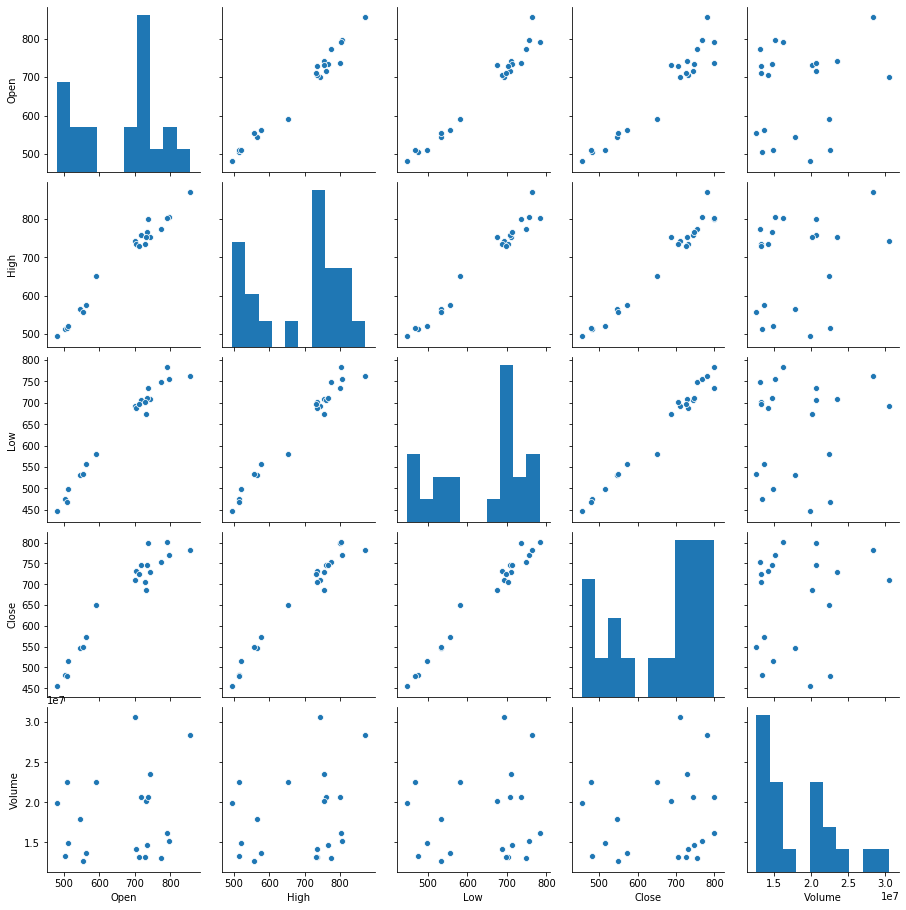

In [62]:
import seaborn

seaborn.pairplot(df[cols])